In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data_encoded.csv", encoding="utf-8")

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns


In [58]:
def count_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum(), lower, upper


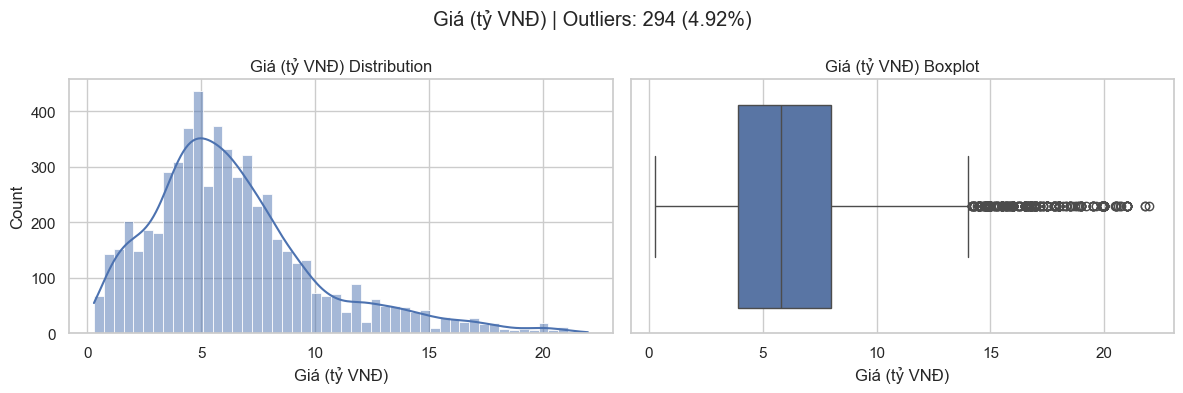

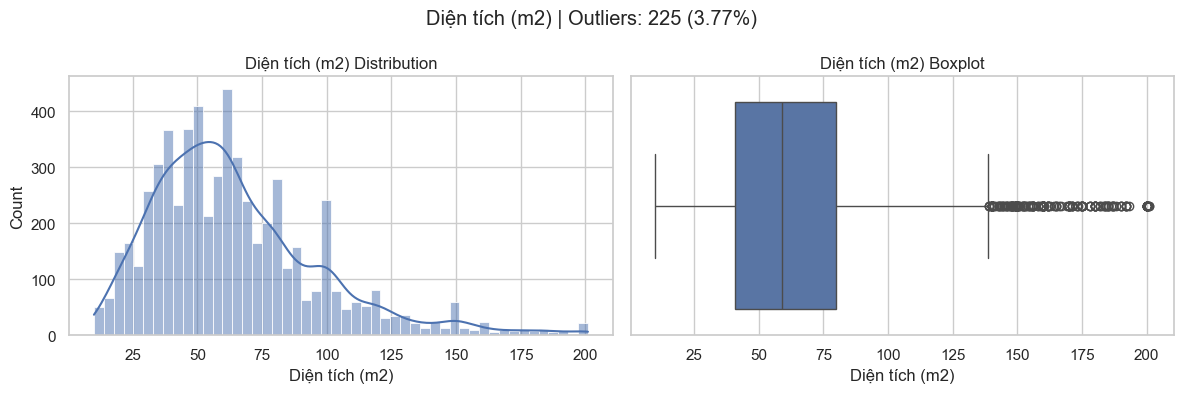

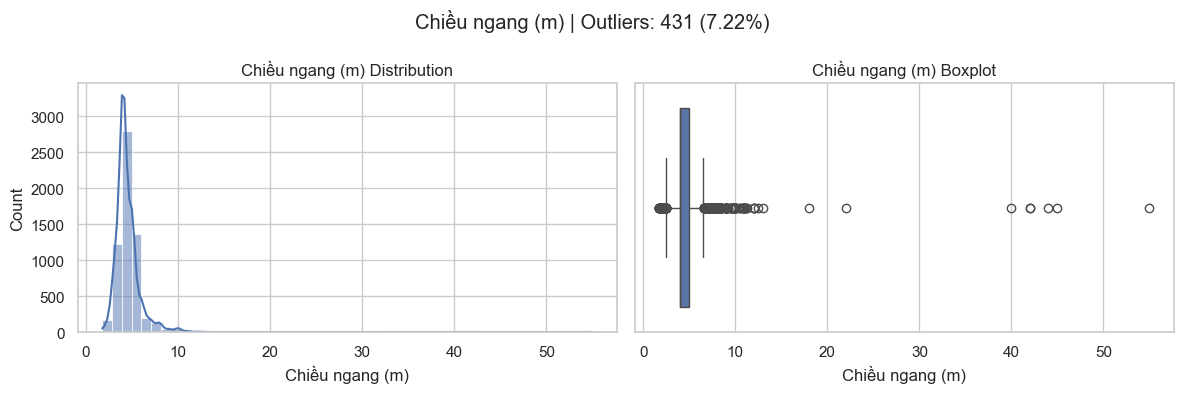

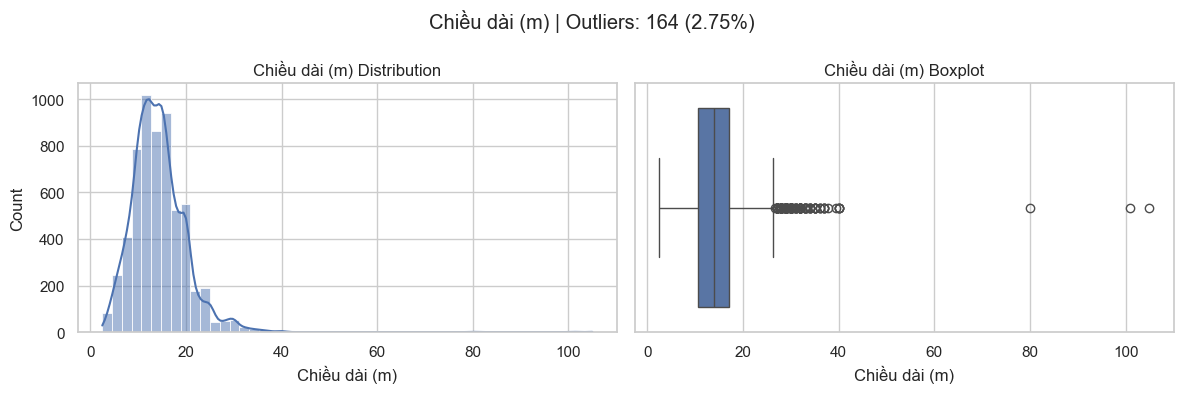

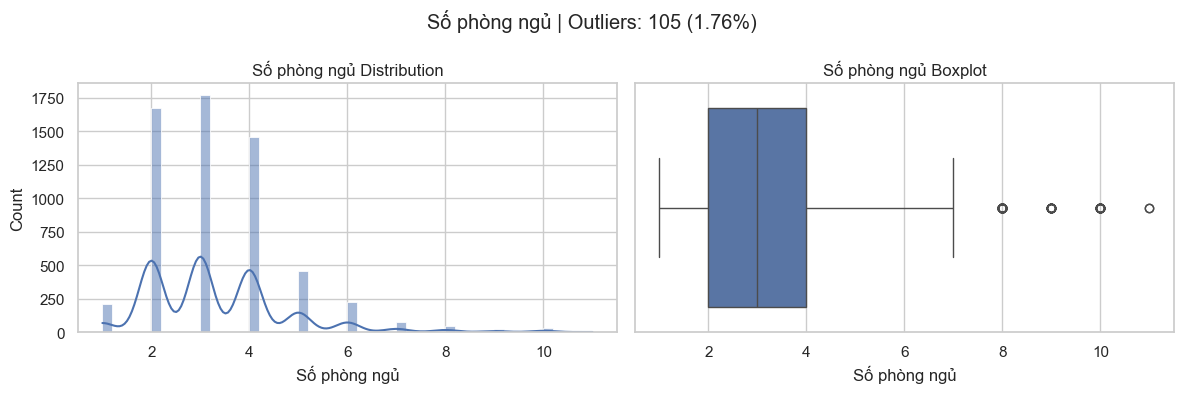

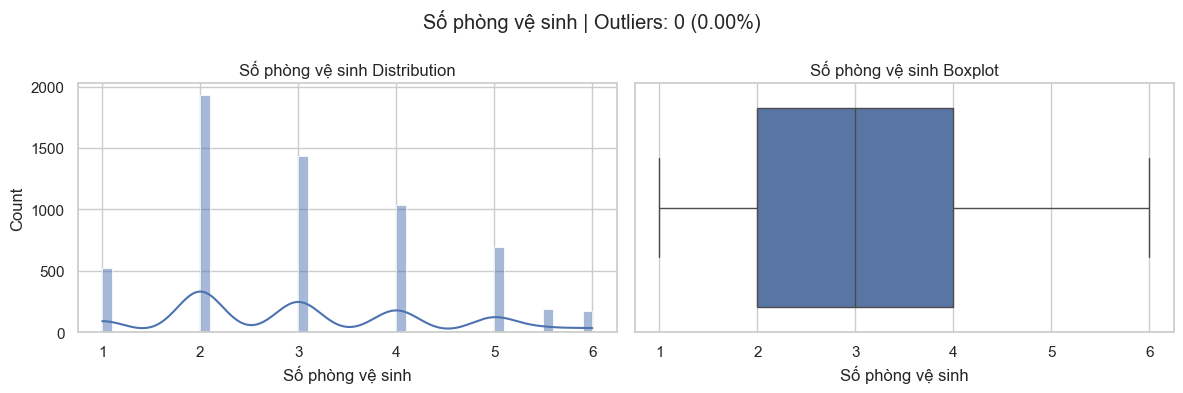

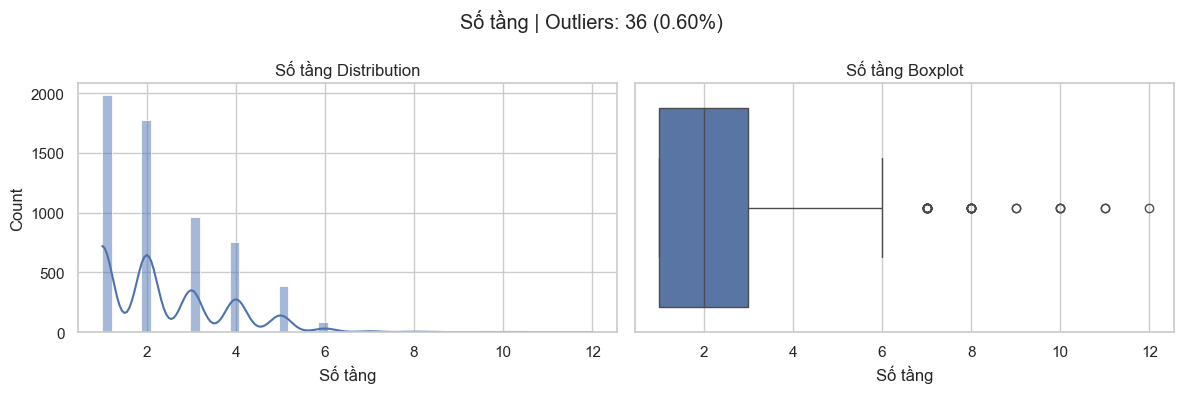

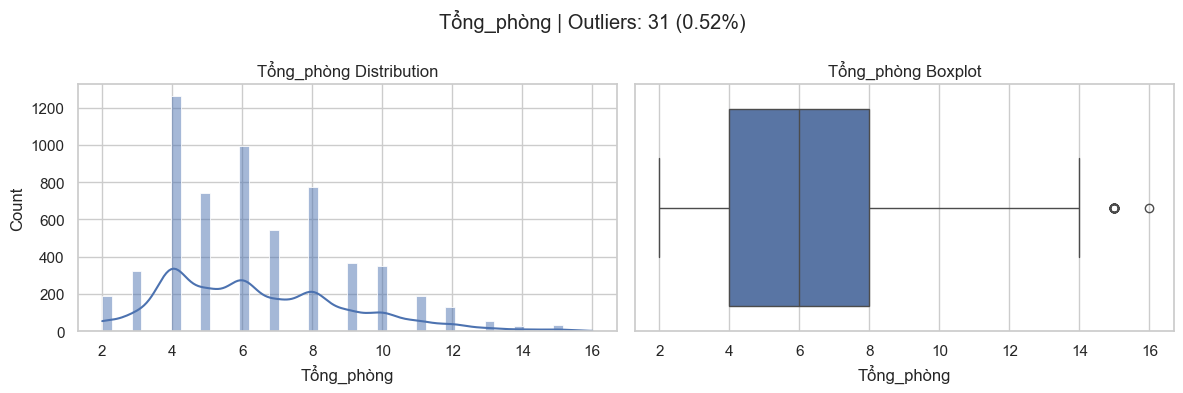

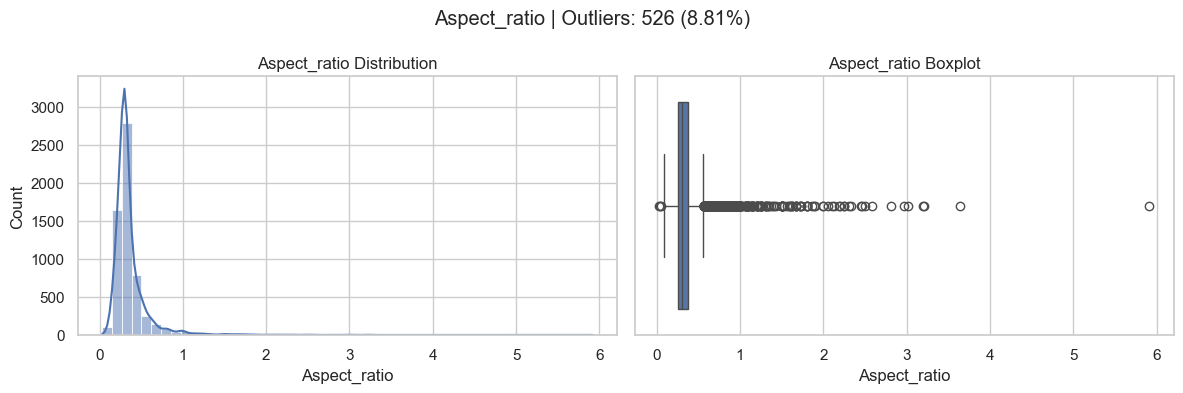

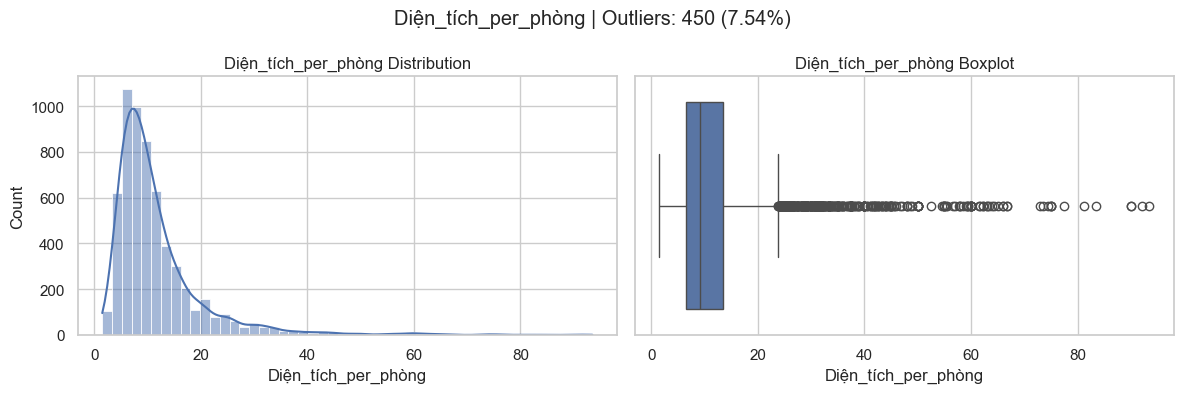

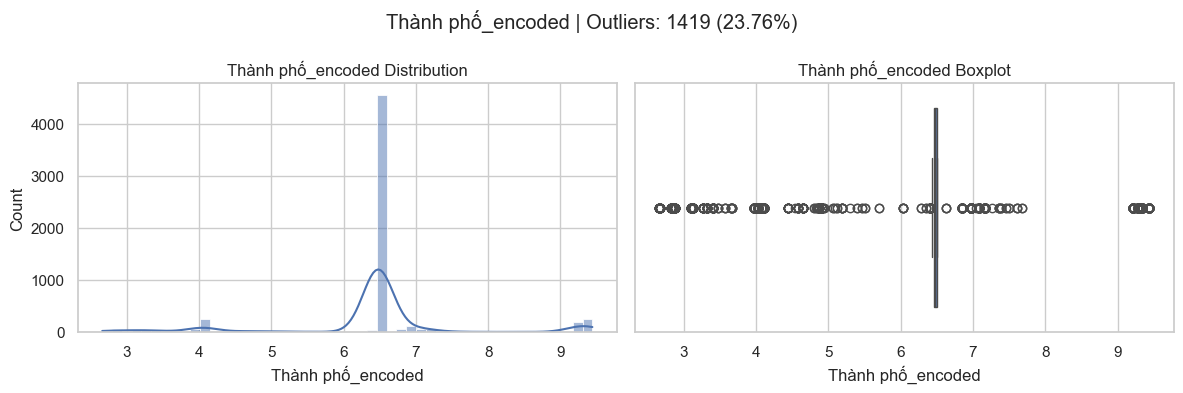

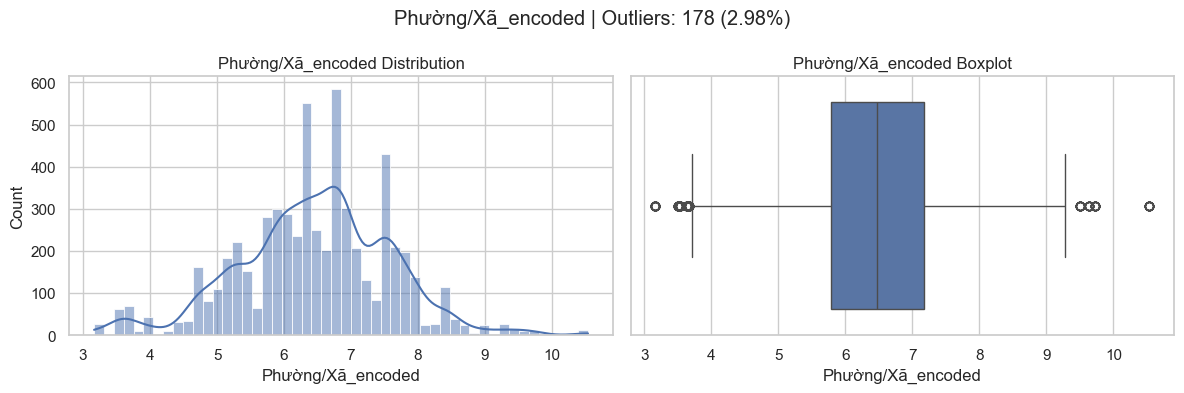

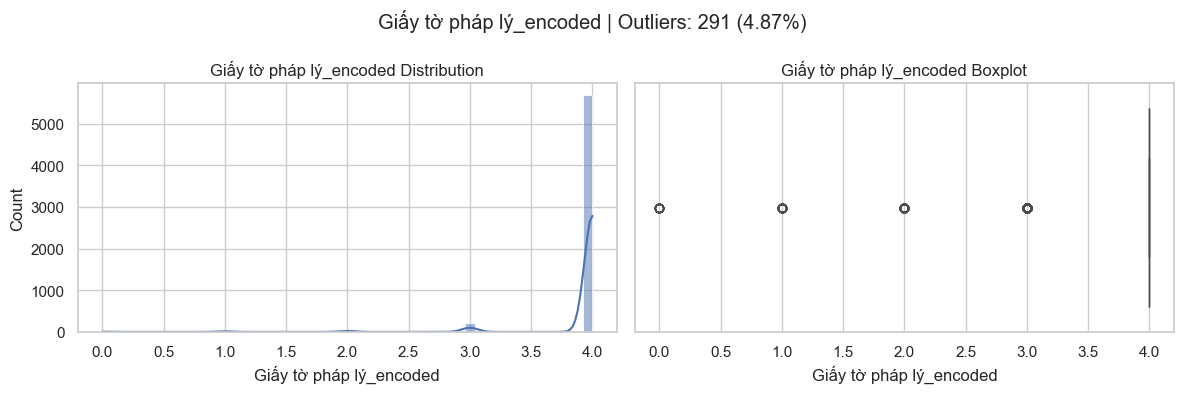

In [59]:
outlier_summary = []

for col in numeric_cols:
    data = df[col].dropna()
    
    outliers, lower, upper = count_outliers_iqr(data)
    ratio = outliers / len(data) * 100
    
    outlier_summary.append([col, outliers, round(ratio, 2)])
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(data, bins=50, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")
    
    sns.boxplot(x=data, ax=axes[1])
    axes[1].set_title(f"{col} Boxplot")
    
    plt.suptitle(f"{col} | Outliers: {outliers} ({ratio:.2f}%)")
    plt.tight_layout()
    plt.show()


In [60]:
import pandas as pd

df = pd.read_csv(
    "data_encoded.csv",
    encoding="utf-8"
)

print(df.columns)
TARGET = "Giá (tỷ VNĐ)"

numeric_features = [
    "Diện tích (m2)",
    "Chiều ngang (m)",
    "Chiều dài (m)",
    "Số phòng ngủ",
    "Số phòng vệ sinh",
    "Số tầng",
    "Tổng_phòng",
    "Aspect_ratio",
    "Diện_tích_per_phòng",
    "Thành phố_encoded",
    "Phường/Xã_encoded",
    "Giấy tờ pháp lý_encoded"
]



Index(['Giá (tỷ VNĐ)', 'Diện tích (m2)', 'Hướng', 'Chiều ngang (m)',
       'Chiều dài (m)', 'Số phòng ngủ', 'Số phòng vệ sinh', 'Số tầng',
       'Tình trạng nội thất', 'Tổng_phòng', 'Aspect_ratio',
       'Diện_tích_per_phòng', 'Thành phố_encoded', 'Phường/Xã_encoded',
       'Loại hình_Nhà biệt thự', 'Loại hình_Nhà mặt phố, mặt tiền',
       'Loại hình_Nhà ngõ, hẻm', 'Loại hình_Nhà phố liền kề',
       'Giấy tờ pháp lý_encoded'],
      dtype='object')


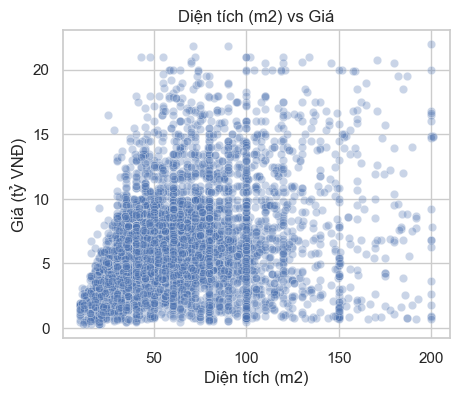

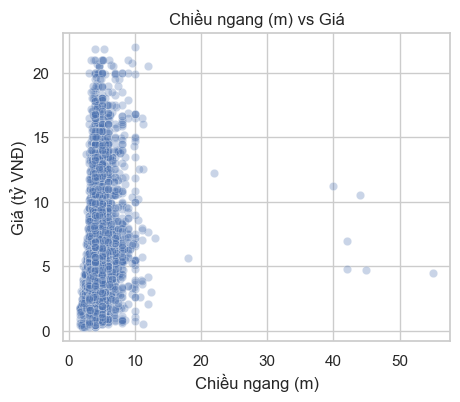

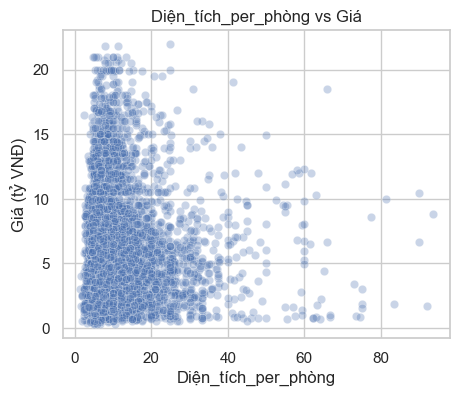

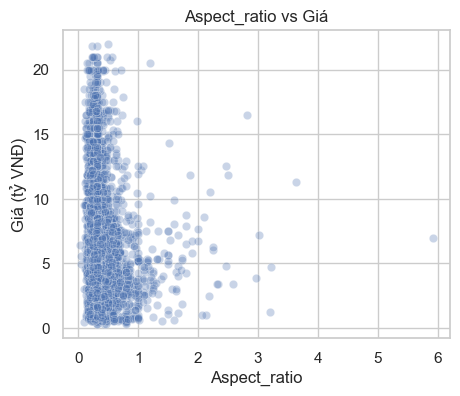

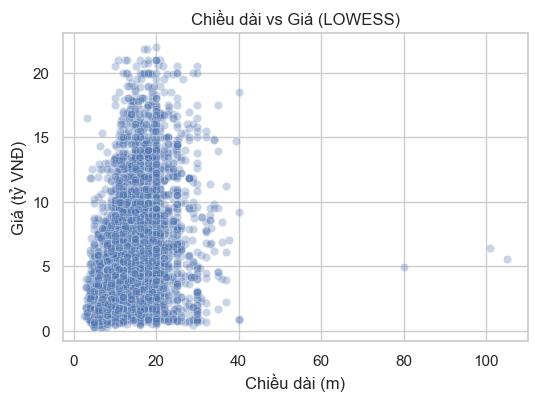

In [61]:
top_features = [
    "Diện tích (m2)",
    "Chiều ngang (m)",
    "Diện_tích_per_phòng",
    "Aspect_ratio"
]


for col in top_features:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(
        data=df,
        x=col,
        y=TARGET,
        alpha=0.3
    )
    plt.title(f"{col} vs Giá")
    plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Chiều dài (m)",
    y=TARGET,
    data=df,
    alpha=0.3
)

plt.title("Chiều dài vs Giá (LOWESS)")
plt.show()


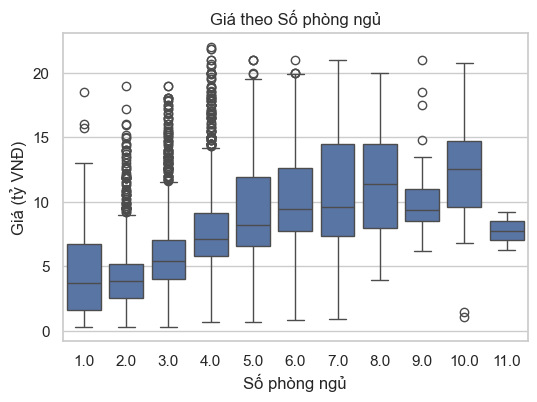

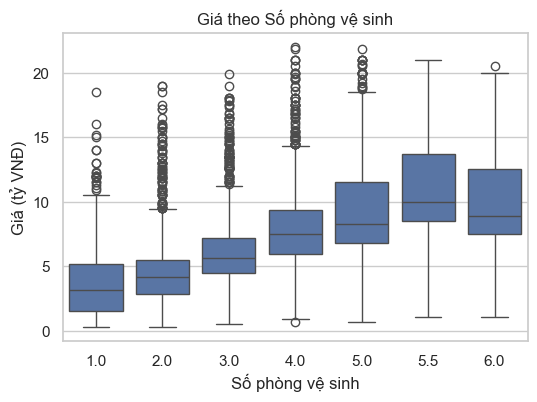

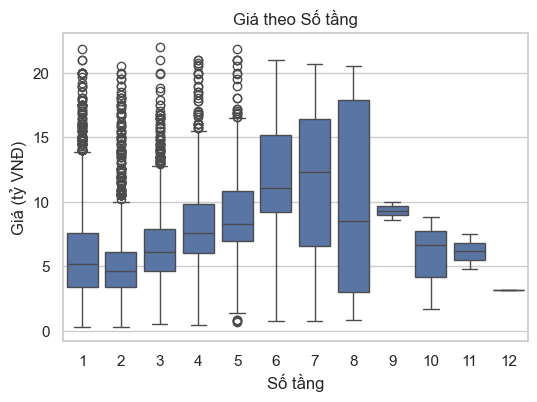

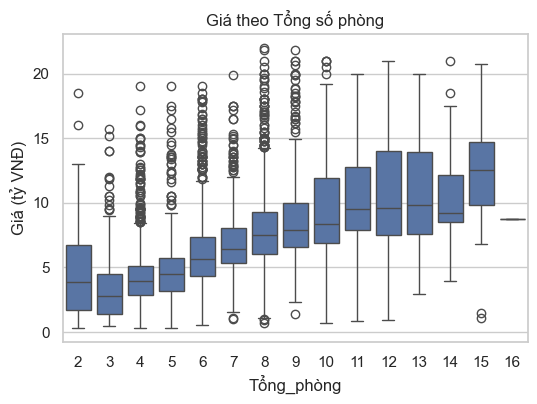

In [62]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    data=df,
    x="Số phòng ngủ",
    y=TARGET
)
plt.title("Giá theo Số phòng ngủ")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(
    x="Số phòng vệ sinh",
    y=TARGET,
    data=df
)
plt.title("Giá theo Số phòng vệ sinh")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(
    x="Số tầng",
    y=TARGET,
    data=df
)
plt.title("Giá theo Số tầng")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(
    x="Tổng_phòng",
    y=TARGET,
    data=df
)
plt.title("Giá theo Tổng số phòng")
plt.show()


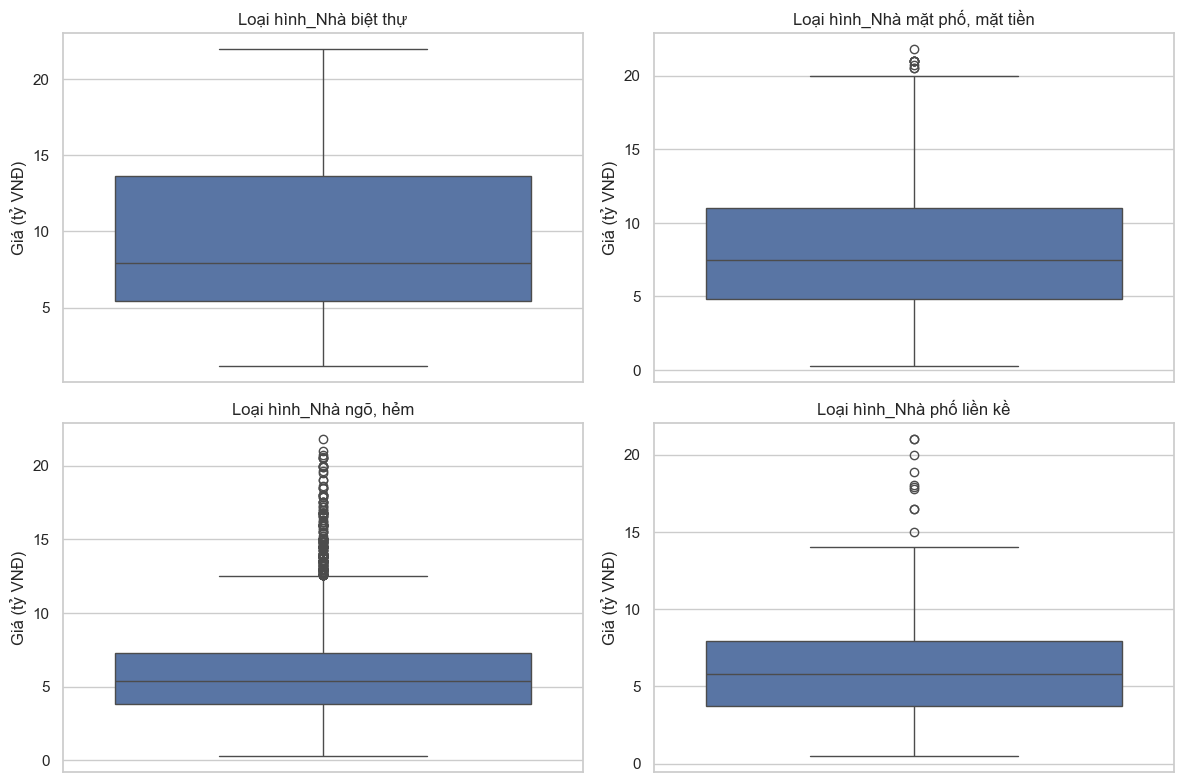

In [63]:
house_types = [
    "Loại hình_Nhà biệt thự",
    "Loại hình_Nhà mặt phố, mặt tiền",
    "Loại hình_Nhà ngõ, hẻm",
    "Loại hình_Nhà phố liền kề"
]

fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()

for ax, col in zip(axes, house_types):
    sns.boxplot(
        y=TARGET,
        data=df[df[col] == True],
        ax=ax
    )
    ax.set_title(col)

plt.tight_layout()
plt.show()


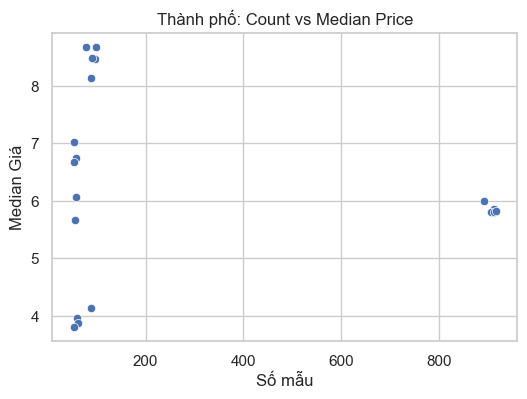

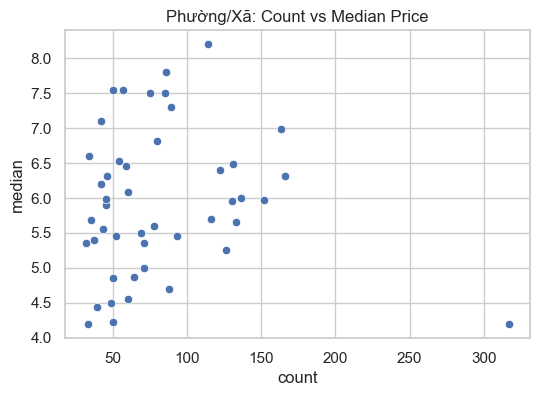

In [64]:
city_stats = (
    df.groupby("Thành phố_encoded")[TARGET]
    .agg(["median", "count"])
    .reset_index()
)

city_stats = city_stats[city_stats["count"] > 50]

plt.figure(figsize=(6,4))
sns.scatterplot(
    x="count",
    y="median",
    data=city_stats
)
plt.xlabel("Số mẫu")
plt.ylabel("Median Giá")
plt.title("Thành phố: Count vs Median Price")
plt.show()

ward_stats = (
    df.groupby("Phường/Xã_encoded")[TARGET]
    .agg(["median", "count"])
    .reset_index()
)

ward_stats = ward_stats[ward_stats["count"] > 30]

plt.figure(figsize=(6,4))
sns.scatterplot(
    x="count",
    y="median",
    data=ward_stats
)
plt.title("Phường/Xã: Count vs Median Price")
plt.show()




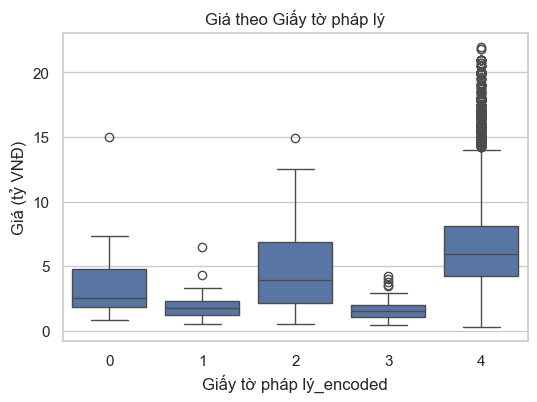

In [65]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x="Giấy tờ pháp lý_encoded",
    y=TARGET,
    data=df
)
plt.title("Giá theo Giấy tờ pháp lý")
plt.show()



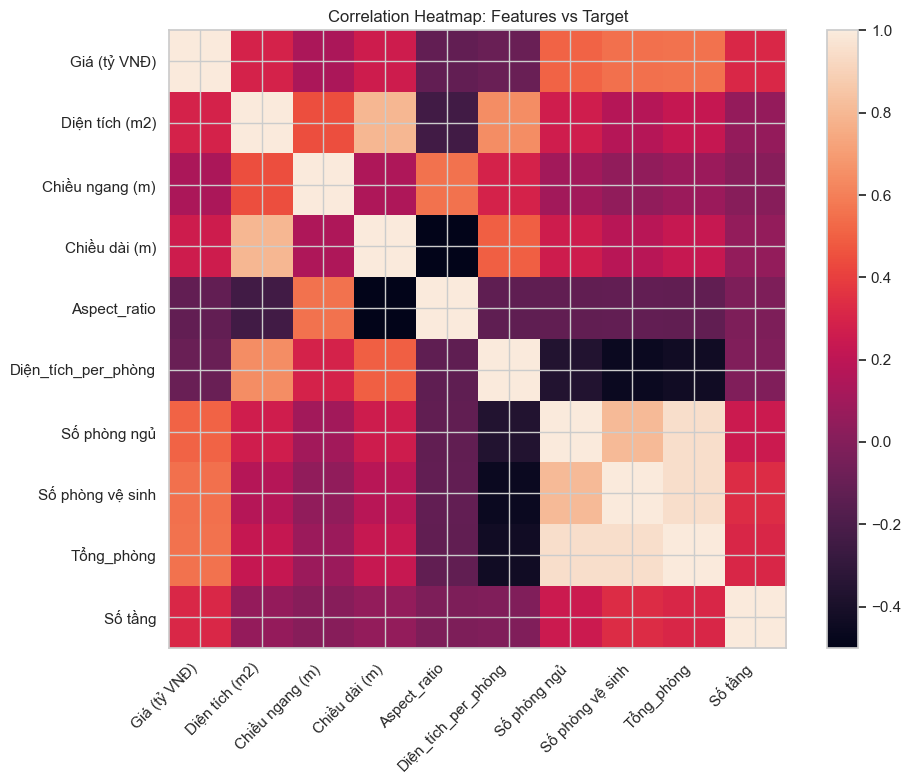

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

corr_features = [
    'Giá (tỷ VNĐ)',          # target
    'Diện tích (m2)',
    'Chiều ngang (m)',
    'Chiều dài (m)',
    'Aspect_ratio',
    'Diện_tích_per_phòng',
    'Số phòng ngủ',
    'Số phòng vệ sinh',
    'Tổng_phòng',
    'Số tầng'
]

corr_df = df[corr_features].copy()
corr_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix)
plt.colorbar()

plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)

plt.title('Correlation Heatmap: Features vs Target')
plt.tight_layout()
plt.show()

